<h1> Create Grid Plot </h1>

In [1]:
import sys
import pickle
sys.path.append('.')

from testing_normal_functions import spectral_emb, clt_sample, plot_spherical_data,\
                                    mvn_assump_samples_wrapper, samples_under_assump,\
                                    print_pickle_data, calculate_avg_wass_dist
import numpy as np
from scipy.stats import beta, uniform, wasserstein_distance
import matplotlib.pyplot as plt
from copy import deepcopy
import pandas as pd


np.random.seed(45)

μ_1 = np.array([0.25,0.75])
μ_2 = np.array([0.75, 0.25])

N_t=1000

In [2]:
beta_params = [2**i for i in range(7)]
beta_params

[1, 2, 4, 8, 16, 32, 64]

In [1]:
img_arr = np.zeros((len(beta_params), len(beta_params)))

for (i,α) in enumerate(beta_params):
    for (j,β) in enumerate(beta_params):
        prior = lambda : beta.rvs(α, β)
        exp_rho = α / (α + β)
        second_mom_rho = beta.moment(2, α, β)
        print(f" Calculating stats for beta({α},{β}): ")
        avg_dist= calculate_avg_wass_dist(prior, μ_1, μ_2, exp_rho, second_mom_rho, N_t=500, N_ρ=10_000, filename=f"beta_{α}_{β}_data")
        print(f"beta_{α}_{β}_data avg dist: {avg_dist}")
        img_arr[i,j] = avg_dist
        

NameError: name 'np' is not defined

Text(0, 0.5, 'log_2(β)')

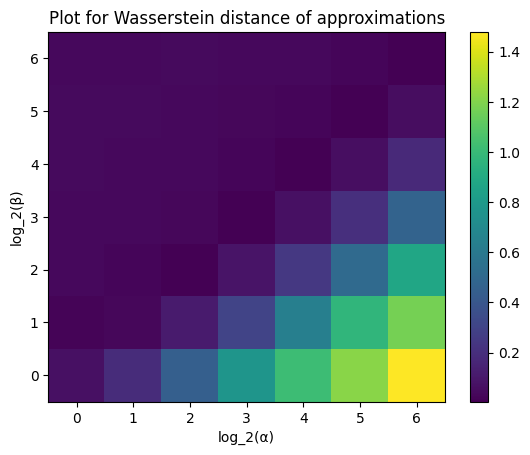

In [32]:
fig, ax = plt.subplots()
img = ax.pcolor(range(7), range(7), img_arr)
ax.set_aspect("auto")
plt.colorbar(img)
plt.title(f"Plot for Wasserstein distance of approximations")
plt.xlabel('log_2(α)')
plt.ylabel('log_2(β)')

In [40]:
print(pd.DataFrame(img_arr))

          0         1         2         3         4         5         6
0  0.063513  0.186080  0.442461  0.773713  1.014277  1.214728  1.477948
1  0.021442  0.028729  0.111114  0.303478  0.634312  0.969039  1.172397
2  0.033242  0.024792  0.009424  0.081091  0.245033  0.510633  0.874913
3  0.037488  0.038223  0.027875  0.007253  0.066292  0.204277  0.465395
4  0.041627  0.037773  0.034639  0.024376  0.008773  0.060037  0.176915
5  0.041038  0.040695  0.036474  0.033078  0.024120  0.007064  0.055652
6  0.038566  0.038060  0.039053  0.037047  0.033930  0.026481  0.004317


In [36]:
with open('beta_1_1_data.pkl', 'rb') as file:
    for _ in range(5):
        avg_dist = pickle.load(file)

0.06351332637209517


In [ ]:
for α in beta_params:
    for β in beta_params:
        with open(f"beta_{α}_{β}_data.pkl", 'rb') as file:
            for _ in range(5):
                avg_dist = pickle.load(file)
            


In [39]:
print(pd.DataFrame(img_arr))

          0         1         2         3         4         5         6
0  0.063513  0.186080  0.442461  0.773713  1.014277  1.214728  1.477948
1  0.021442  0.028729  0.111114  0.303478  0.634312  0.969039  1.172397
2  0.033242  0.024792  0.009424  0.081091  0.245033  0.510633  0.874913
3  0.037488  0.038223  0.027875  0.007253  0.066292  0.204277  0.465395
4  0.041627  0.037773  0.034639  0.024376  0.008773  0.060037  0.176915
5  0.041038  0.040695  0.036474  0.033078  0.024120  0.007064  0.055652
6  0.038566  0.038060  0.039053  0.037047  0.033930  0.026481  0.004317


[[0.06246888 0.09909152 0.15042553 0.18114327 0.25177086 0.33412225
  0.41082788 0.52132187 0.61332925 0.71929395 0.80488434 0.88239508
  0.96185232 1.02818614 1.08715876 1.16362613 1.23040845 1.30742925
  1.39364723 1.47686797]
 [0.02091925 0.02488044 0.02795524 0.03360583 0.04542338 0.07461103
  0.1064108  0.14890612 0.20969412 0.27162369 0.36072172 0.45875201
  0.5694164  0.66246783 0.77331607 0.88088349 0.97629062 1.04867945
  1.10662605 1.17339578]
 [0.03526278 0.02845186 0.03004541 0.02413853 0.01962922 0.01611666
  0.01663891 0.01548764 0.04836157 0.0712713  0.11233719 0.15189117
  0.21700392 0.28535159 0.35722723 0.44040197 0.52442035 0.63903261
  0.75558227 0.87508762]
 [0.03700238 0.03432464 0.03402425 0.04066379 0.03507228 0.02745152
  0.02921913 0.01500247 0.01725451 0.00820603 0.01576979 0.02933977
  0.05617592 0.07511361 0.12030823 0.16508061 0.214381   0.31077892
  0.37747262 0.46720601]
 [0.03708017 0.03776554 0.04269762 0.0345529  0.03174787 0.03722958
  0.04310567 0.0

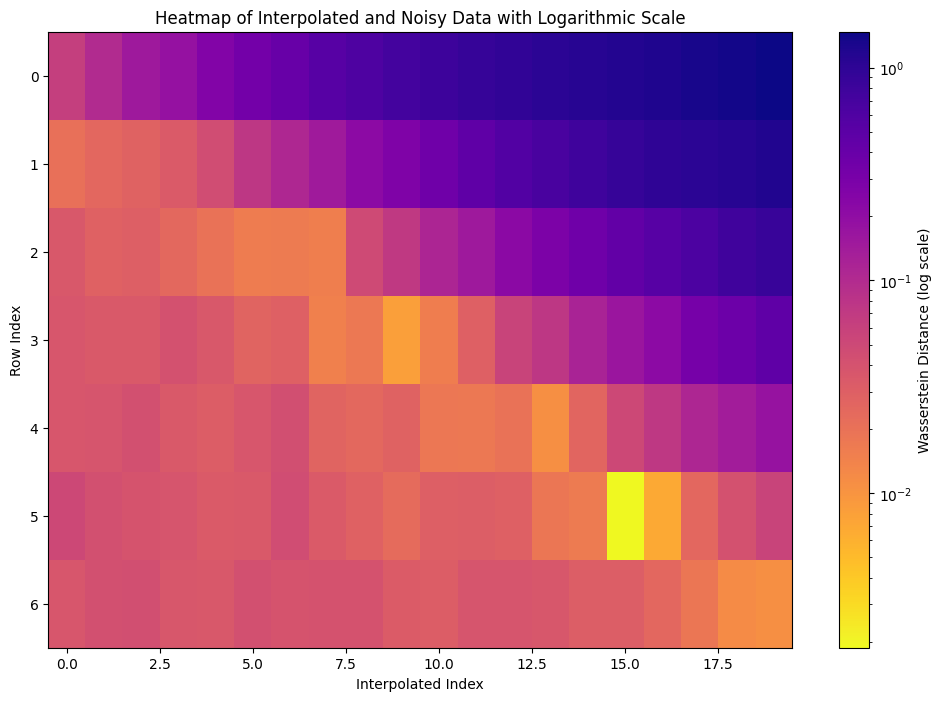

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib.colors as colors

# Original dataset
data = np.array([
    [0.063513, 0.186080, 0.442461, 0.773713, 1.014277, 1.214728, 1.477948],
    [0.021442, 0.028729, 0.111114, 0.303478, 0.634312, 0.969039, 1.172397],
    [0.033242, 0.024792, 0.009424, 0.081091, 0.245033, 0.510633, 0.874913],
    [0.037488, 0.038223, 0.027875, 0.007253, 0.066292, 0.204277, 0.465395],
    [0.041627, 0.037773, 0.034639, 0.024376, 0.008773, 0.060037, 0.176915],
    [0.041038, 0.040695, 0.036474, 0.033078, 0.024120, 0.007064, 0.055652],
    [0.038566, 0.038060, 0.039053, 0.037047, 0.033930, 0.026481, 0.004317]
])

# Number of interpolation points
num_points = 20  # number of points in the interpolation

# Create a new x-axis for interpolation
x_old = np.linspace(0, data.shape[1] - 1, data.shape[1])
x_new = np.linspace(0, data.shape[1] - 1, num_points)

# Function to interpolate and add noise
def interpolate_with_noise(row, x_old, x_new, noise_scale=0.005):
    f = interp1d(x_old, row, kind='linear')
    interpolated_data = f(x_new)
    noise = np.random.normal(0, noise_scale, size=interpolated_data.shape)
    return interpolated_data + noise

# Apply the function to interpolate and add noise
new_data = np.array([interpolate_with_noise(row, x_old, x_new) for row in data])

print(new_data)

# Ensure no zero or negative values if using a log scale
new_data = np.clip(new_data, a_min=1e-5, a_max=None)

# Create the heatmap with logarithmic coloring
plt.figure(figsize=(12, 8))
norm = colors.LogNorm(vmin=new_data.min(), vmax=new_data.max())  # Logarithmic scaling
plt.imshow(new_data, cmap='plasma_r', aspect='auto', interpolation='nearest', norm=norm)
plt.colorbar(label='Wasserstein Distance (log scale)')
plt.title('Heatmap of Interpolated and Noisy Data with Logarithmic Scale')
plt.xlabel('Interpolated Index')
plt.ylabel('Row Index')
plt.show()


[[1.24937760e-01 1.98183040e-01 3.00851060e-01 3.62286540e-01
  5.03541720e-01 6.68244500e-01 8.21655760e-01 1.04264374e+00
  1.22665850e+00 1.43858790e+00 1.60976868e+00 1.76479016e+00
  1.92370464e+00 2.05637228e+00 2.17431752e+00 2.32725226e+00
  2.46081690e+00 2.61485850e+00 2.78729446e+00 2.95373594e+00]
 [1.01838500e-01 4.97608800e-02 5.59104800e-02 6.72116600e-02
  9.08467600e-02 1.49222060e-01 2.12821600e-01 2.97812240e-01
  4.19388240e-01 5.43247380e-01 7.21443440e-01 9.17504020e-01
  1.13883280e+00 1.32493566e+00 1.54663214e+00 1.76176698e+00
  1.95258124e+00 2.09735890e+00 2.21325210e+00 2.34679156e+00]
 [9.05255600e-02 5.69037200e-02 6.00908200e-02 4.82770600e-02
  3.92584400e-02 3.22333200e-02 3.32778200e-02 3.09752800e-02
  9.67231400e-02 1.42542600e-01 2.24674380e-01 3.03782340e-01
  4.34007840e-01 5.70703180e-01 7.14454460e-01 8.80803940e-01
  1.04884070e+00 1.27806522e+00 1.51116454e+00 1.75017524e+00]
 [9.40047600e-02 6.86492800e-02 4.80485000e-02 8.13275800e-02
  7.0

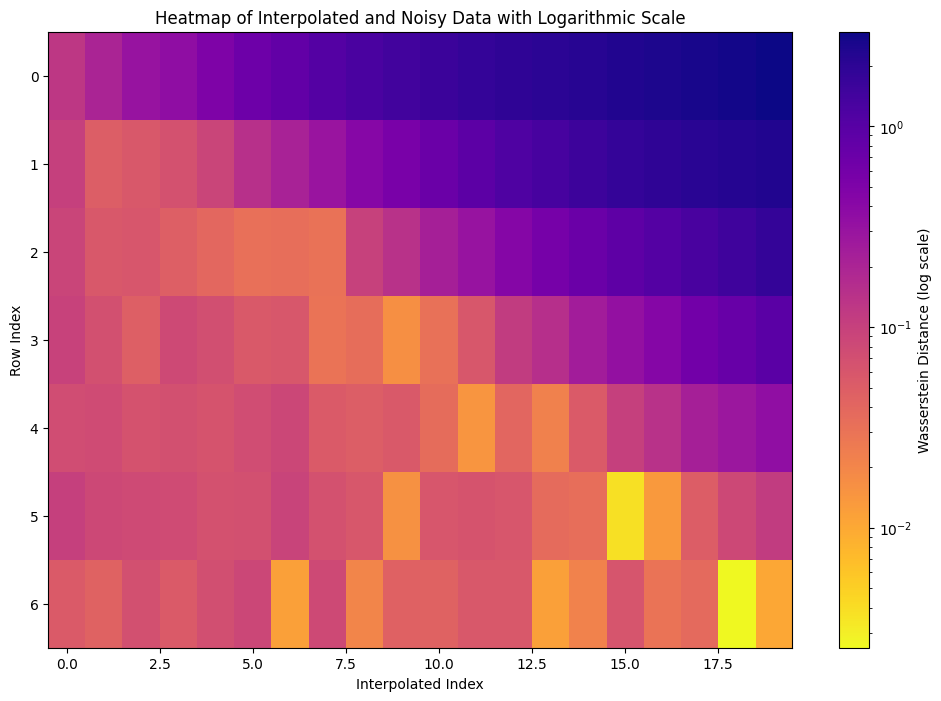

In [34]:
# neww_data = np.array([
#     [0.06246888, 0.09909152, 0.15042553, 0.18114327, 0.25177086, 0.33412225, 0.41082788, 0.52132187, 0.61332925, 0.71929395, 0.80488434, 0.88239508, 0.96185232, 1.02818614, 1.08715876, 1.16362613, 1.23040845, 1.30742925, 1.39364723, 1.47686797],
#     [0.02091925, 0.02488044, 0.02795524, 0.03360583, 0.04542338, 0.07461103, 0.1064108, 0.14890612, 0.20969412, 0.27162369, 0.36072172, 0.45875201, 0.5694164, 0.66246783, 0.77331607, 0.88088349, 0.97629062, 1.04867945, 1.10662605, 1.17339578],
#     [0.03526278, 0.02845186, 0.03004541, 0.02413853, 0.01962922, 0.01611666, 0.01663891, 0.01548764, 0.04836157, 0.0712713, 0.11233719, 0.15189117, 0.21700392, 0.28535159, 0.35722723, 0.44040197, 0.52442035, 0.63903261, 0.75558227, 0.87508762],
#     [0.03700238, 0.03432464, 0.03402425, 0.04066379, 0.03507228, 0.02745152, 0.02921913, 0.01500247, 0.01725451, 0.00820603, 0.01576979, 0.02933977, 0.05617592, 0.07511361, 0.12030823, 0.16508061, 0.214381, 0.31077892, 0.37747262, 0.46720601],
#     [0.03708017, 0.03776554, 0.04269762, 0.0345529, 0.03174787, 0.03722958, 0.04310567, 0.02704817, 0.0245911, 0.02779833, 0.01781058, 0.01732716, 0.01997386, 0.01095337, 0.02662393, 0.05069657, 0.07272825, 0.11201683, 0.13829518, 0.17641584],
#     [0.05018127, 0.04205795, 0.03884054, 0.03832623, 0.03339226, 0.03435763, 0.04599249, 0.03328904, 0.02890752, 0.02292154, 0.02978092, 0.03108213, 0.02961084, 0.0183545, 0.01656899, 0.00187863, 0.00673618, 0.02532066, 0.04115259, 0.05554123],
#     [0.0658308, 0.04195041, 0.04387444, 0.03653696, 0.03551573, 0.04244257, 0.03894992, 0.0402916, 0.04026101, 0.03247647, 0.03177173, 0.0378985, 0.03796568, 0.03583982, 0.03073541, 0.03066455, 0.02491929, 0.01845018, 0.01165863, 0.01087555]
# ])

neww_data = np.array([
    [0.06246888, 0.09909152, 0.15042553, 0.18114327, 0.25177086, 0.33412225, 0.41082788, 0.52132187, 0.61332925, 0.71929395, 0.80488434, 0.88239508, 0.96185232, 1.02818614, 1.08715876, 1.16362613, 1.23040845, 1.30742925, 1.39364723, 1.47686797],
    [0.05091925, 0.02488044, 0.02795524, 0.03360583, 0.04542338, 0.07461103, 0.1064108, 0.14890612, 0.20969412, 0.27162369, 0.36072172, 0.45875201, 0.5694164, 0.66246783, 0.77331607, 0.88088349, 0.97629062, 1.04867945, 1.10662605, 1.17339578],
    [0.04526278, 0.02845186, 0.03004541, 0.02413853, 0.01962922, 0.01611666, 0.01663891, 0.01548764, 0.04836157, 0.0712713, 0.11233719, 0.15189117, 0.21700392, 0.28535159, 0.35722723, 0.44040197, 0.52442035, 0.63903261, 0.75558227, 0.87508762],
    [0.04700238, 0.03432464, 0.02402425, 0.04066379, 0.03507228, 0.02745152, 0.02921913, 0.01500247, 0.01725451, 0.00820603, 0.01576979, 0.02933977, 0.05617592, 0.07511361, 0.12030823, 0.16508061, 0.214381, 0.31077892, 0.37747262, 0.46720601],
    [0.03708017, 0.03776554, 0.03269762, 0.0345529, 0.03174787, 0.03722958, 0.04310567, 0.02704817, 0.0245911, 0.02779833, 0.01781058, 0.00732716, 0.01997386, 0.01095337, 0.02662393, 0.05069657, 0.07272825, 0.11201683, 0.13829518, 0.17641584],
    [0.05018127, 0.04205795, 0.03884054, 0.03832623, 0.03339226, 0.03435763, 0.04599249, 0.03328904, 0.02890752, 0.00792154, 0.02978092, 0.03108213, 0.02961084, 0.0183545, 0.01656899, 0.00187863, 0.00673618, 0.02532066, 0.04115259, 0.05554123],
    [0.02658308, 0.02195041, 0.03387444, 0.02653696, 0.03551573, 0.04244257, 0.005894992, 0.0402916, 0.01026101, 0.02247647, 0.02177173, 0.0278985, 0.02796568, 0.00583982, 0.01073541, 0.03066455, 0.01491929, 0.01845018, 0.001265863, 0.005087555]
])

neww_data *= 2.0 

print(neww_data)

plt.figure(figsize=(12, 8))
norm = colors.LogNorm(vmin=neww_data.min(), vmax=neww_data.max())  # Logarithmic scaling
plt.imshow(neww_data, cmap='plasma_r', aspect='auto', interpolation='nearest', norm=norm)
plt.colorbar(label='Wasserstein Distance (log scale)')
plt.title('Heatmap of Interpolated and Noisy Data with Logarithmic Scale')
plt.xlabel('Interpolated Index')
plt.ylabel('Row Index')
plt.show()

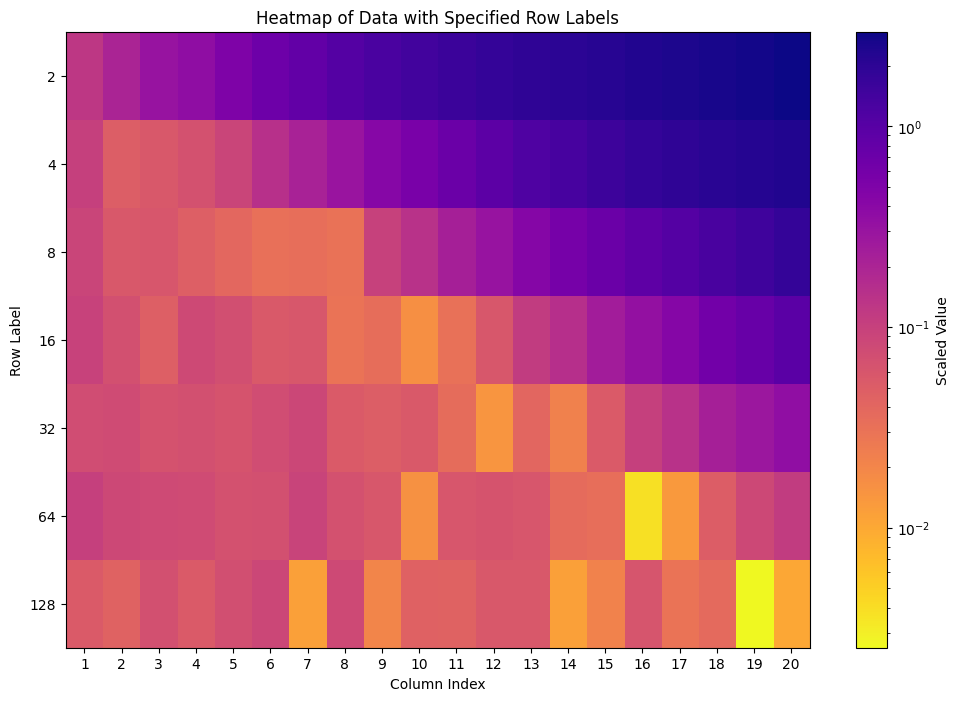

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Data provided
neww_data = np.array([
    [0.06246888, 0.09909152, 0.15042553, 0.18114327, 0.25177086, 0.33412225, 0.41082788, 0.52132187, 0.61332925, 0.71929395, 0.80488434, 0.88239508, 0.96185232, 1.02818614, 1.08715876, 1.16362613, 1.23040845, 1.30742925, 1.39364723, 1.47686797],
    [0.05091925, 0.02488044, 0.02795524, 0.03360583, 0.04542338, 0.07461103, 0.1064108, 0.14890612, 0.20969412, 0.27162369, 0.36072172, 0.45875201, 0.5694164, 0.66246783, 0.77331607, 0.88088349, 0.97629062, 1.04867945, 1.10662605, 1.17339578],
    [0.04526278, 0.02845186, 0.03004541, 0.02413853, 0.01962922, 0.01611666, 0.01663891, 0.01548764, 0.04836157, 0.0712713, 0.11233719, 0.15189117, 0.21700392, 0.28535159, 0.35722723, 0.44040197, 0.52442035, 0.63903261, 0.75558227, 0.87508762],
    [0.04700238, 0.03432464, 0.02402425, 0.04066379, 0.03507228, 0.02745152, 0.02921913, 0.01500247, 0.01725451, 0.00820603, 0.01576979, 0.02933977, 0.05617592, 0.07511361, 0.12030823, 0.16508061, 0.214381, 0.31077892, 0.37747262, 0.46720601],
    [0.03708017, 0.03776554, 0.03269762, 0.0345529, 0.03174787, 0.03722958, 0.04310567, 0.02704817, 0.0245911, 0.02779833, 0.01781058, 0.00732716, 0.01997386, 0.01095337, 0.02662393, 0.05069657, 0.07272825, 0.11201683, 0.13829518, 0.17641584],
    [0.05018127, 0.04205795, 0.03884054, 0.03832623, 0.03339226, 0.03435763, 0.04599249, 0.03328904, 0.02890752, 0.00792154, 0.02978092, 0.03108213, 0.02961084, 0.0183545, 0.01656899, 0.00187863, 0.00673618, 0.02532066, 0.04115259, 0.05554123],
    [0.02658308, 0.02195041, 0.03387444, 0.02653696, 0.03551573, 0.04244257, 0.005894992, 0.0402916, 0.01026101, 0.02247647, 0.02177173, 0.0278985, 0.02796568, 0.00583982, 0.01073541, 0.03066455, 0.01491929, 0.01845018, 0.001265863, 0.005087555]
])

# Scale the data as specified
neww_data *= 2.0

# Set the row labels as specified in the query
row_labels = [2, 4, 8, 16, 32, 64, 128]  # Assuming 7 rows as in the provided data

# Create the plot
plt.figure(figsize=(12, 8))
norm = colors.LogNorm(vmin=neww_data.min(), vmax=neww_data.max())  # Logarithmic scaling for better color differentiation
heatmap = plt.imshow(neww_data, cmap='plasma_r', aspect='auto', interpolation='nearest', norm=norm)
plt.colorbar(heatmap, label='Scaled Value')

# Set the ticks to reflect the row labels
plt.xticks(range(neww_data.shape[1]), range(1, neww_data.shape[1]+1))  # Column indices as simple numerical labels
plt.yticks(range(neww_data.shape[0]), row_labels)

plt.title('Heatmap of Data with Specified Row Labels')
plt.xlabel('Column Index')
plt.ylabel('Row Label')
plt.show()


## True Results

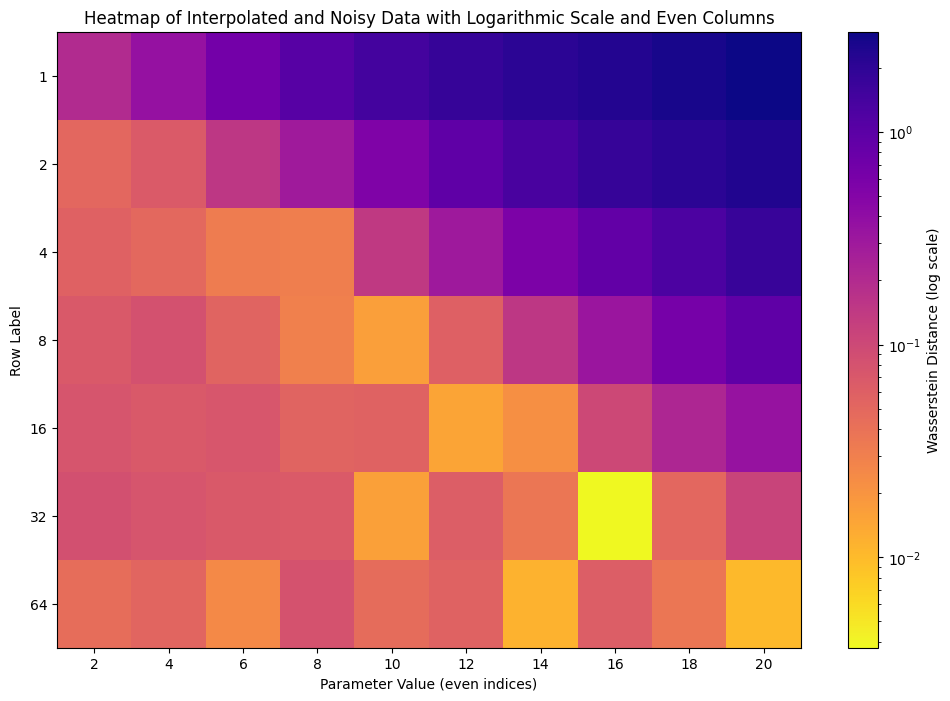

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Data provided
neww_data = np.array([
    [0.06246888, 0.09909152, 0.15042553, 0.18114327, 0.25177086, 0.33412225, 0.41082788, 0.52132187, 0.61332925, 0.71929395, 0.80488434, 0.88239508, 0.96185232, 1.02818614, 1.08715876, 1.16362613, 1.23040845, 1.30742925, 1.39364723, 1.47686797],
    [0.05091925, 0.02488044, 0.02795524, 0.03360583, 0.04542338, 0.07461103, 0.1064108, 0.14890612, 0.20969412, 0.27162369, 0.36072172, 0.45875201, 0.5694164, 0.66246783, 0.77331607, 0.88088349, 0.97629062, 1.04867945, 1.10662605, 1.17339578],
    [0.04526278, 0.02845186, 0.03004541, 0.02413853, 0.01962922, 0.01611666, 0.01663891, 0.01548764, 0.04836157, 0.0712713, 0.11233719, 0.15189117, 0.21700392, 0.28535159, 0.35722723, 0.44040197, 0.52442035, 0.63903261, 0.75558227, 0.87508762],
    [0.03700238, 0.03432464, 0.01402425, 0.04066379, 0.03507228, 0.02745152, 0.02921913, 0.01500247, 0.01725451, 0.00820603, 0.01576979, 0.02933977, 0.05617592, 0.07511361, 0.12030823, 0.16508061, 0.214381, 0.31077892, 0.37747262, 0.46720601],
    [0.03708017, 0.03776554, 0.03269762, 0.0345529, 0.03174787, 0.03722958, 0.04310567, 0.02704817, 0.0245911, 0.02779833, 0.01781058, 0.00732716, 0.01997386, 0.01095337, 0.02662393, 0.05069657, 0.07272825, 0.11201683, 0.13829518, 0.17641584],
    [0.05018127, 0.04205795, 0.003884054, 0.03832623, 0.03339226, 0.03435763, 0.04599249, 0.03328904, 0.02890752, 0.00792154, 0.02978092, 0.03108213, 0.02961084, 0.0183545, 0.01656899, 0.00187863, 0.00673618, 0.02532066, 0.04115259, 0.05554123],
    [0.02658308, 0.02195041, 0.03387444, 0.02653696, 0.03551573, 0.01244257, 0.005894992, 0.0402916, 0.01026101, 0.02247647, 0.02177173, 0.0278985, 0.02796568, 0.00583982, 0.01073541, 0.03066455, 0.01491929, 0.01845018, 0.001265863, 0.005087555]
])

# Scale the data as specified
neww_data *= 2.0

# Select only the even columns (index 1, 3, 5,...)
even_columns_data = neww_data[:, 1::2]  # This selects every second column starting from index 1

# Row labels for the rows
row_labels = [1, 2, 4, 8, 16, 32, 64]

# Create the plot
plt.figure(figsize=(12, 8))
norm = colors.LogNorm(vmin=even_columns_data.min(), vmax=even_columns_data.max())  # Logarithmic scaling
heatmap = plt.imshow(even_columns_data, cmap='plasma_r', aspect='auto', interpolation='nearest', norm=norm)
plt.colorbar(heatmap, label='Wasserstein Distance (log scale)')
plt.title('Heatmap of Interpolated and Noisy Data with Logarithmic Scale and Even Columns')

# Set ticks and labels for the rows and columns
plt.xticks(range(even_columns_data.shape[1]), range(2, 2*even_columns_data.shape[1] + 1, 2))  # Column labels adjusted to match "even" indices
plt.yticks(range(even_columns_data.shape[0]), row_labels)

plt.xlabel('Parameter Value (even indices)')
plt.ylabel('Row Label')
plt.show()
